In [1]:
import pandas as pd
import numpy as np                                                                             
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data=pd.read_csv('webmd.csv')

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


### Displaying basic details of the dataset

In [4]:
data.shape

(362806, 12)

In [5]:
df=pd.DataFrame(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 23.5+ MB


In [7]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [8]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [9]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

## pre processing

### checking for missing values

In [10]:
df.replace(' ',np.nan,inplace =True)

In [11]:
df.isna().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [12]:
#handling missing values

In [13]:
df.dropna(inplace=True,axis=0)

In [14]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Data visualisations

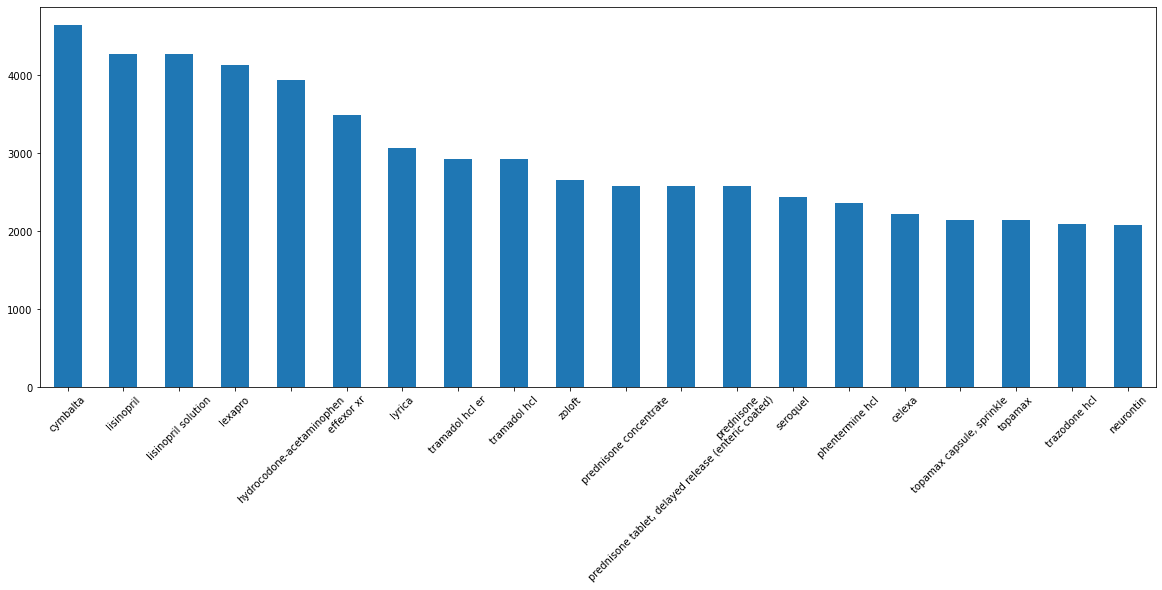

In [15]:
plt.figure(figsize = (20,7))

data['Drug'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=45)

plt.show()

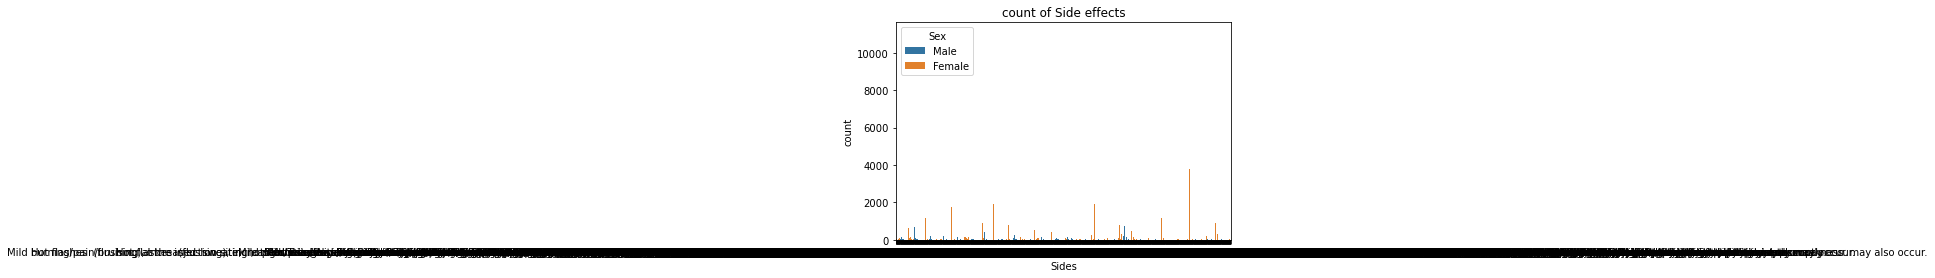

In [16]:
sns.countplot(data=data,x='Sides',hue ='Sex')
plt.title("count of Side effects")
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


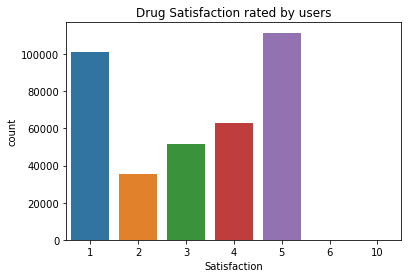

In [17]:
sns.countplot(data['Satisfaction'])
plt.title("Drug Satisfaction rated by users")
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


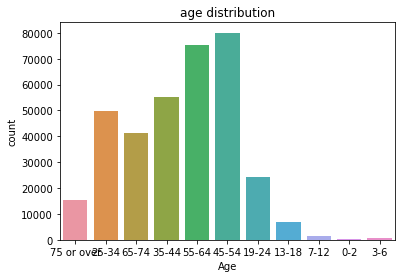

In [18]:
sns.countplot(data['Age'])
plt.title("age distribution")
plt.show()

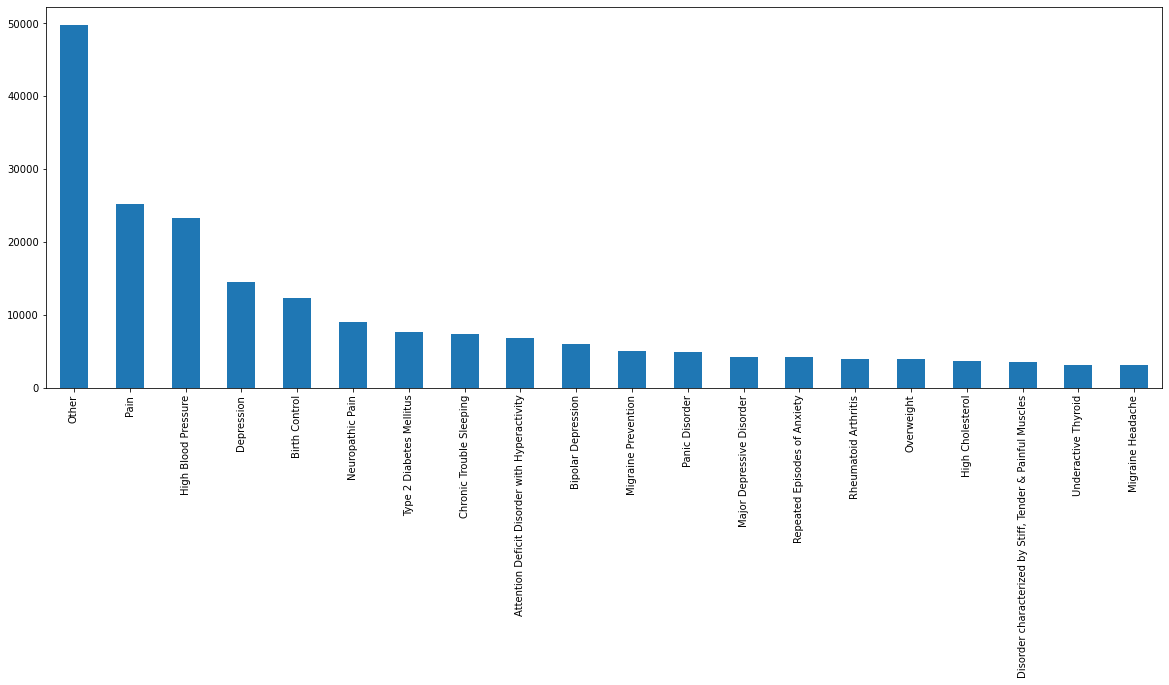

In [20]:
plt.figure(figsize = (20,7))

data['Condition'].value_counts().head(20).plot(kind='bar')

plt.show()

sns.scatterplot(data=df[1000],x='Condition', y='Drug', hue='Effectiveness')


# Encoding


In [21]:
col=['Drug','Satisfaction','Effectiveness','Sex','Sides','UsefulCount']
for i in col :
    print(i)
    print(data[i].value_counts())

Drug
cymbalta                                                  4648
lisinopril                                                4269
lisinopril solution                                       4269
lexapro                                                   4134
hydrocodone-acetaminophen                                 3944
                                                          ... 
rixubis vial                                                 1
glutarade junior 10 gram-410 kcal/100 gram oral powder       1
scandishake                                                  1
bromi-lotion lotion                                          1
minerin lotion                                               1
Name: Drug, Length: 7093, dtype: int64
Satisfaction
5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64
Effectiveness
5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, 

{'whiskers': [<matplotlib.lines.Line2D at 0xefb99e8>,
 'caps': [<matplotlib.lines.Line2D at 0xefb9490>,
 'boxes': [<matplotlib.lines.Line2D at 0xefb9580>],
 'medians': [<matplotlib.lines.Line2D at 0xefb97c0>],
 'fliers': [<matplotlib.lines.Line2D at 0xefb9988>],
 'means': []}

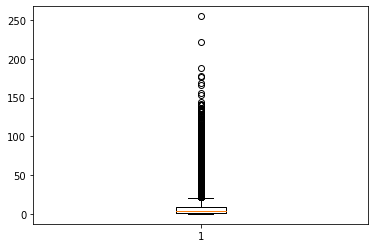

In [22]:


plt.boxplot(data['UsefulCount'] )


In [23]:
Q1 = np.percentile(data['UsefulCount'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['UsefulCount'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['UsefulCount'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [24]:
ind2 = data['UsefulCount']>up_lim

data.drop((data.loc[ind2].index), inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0xe5682f8>,
 'caps': [<matplotlib.lines.Line2D at 0xe5684f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe568fb8>],
 'medians': [<matplotlib.lines.Line2D at 0xee709a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xee709b8>],
 'means': []}

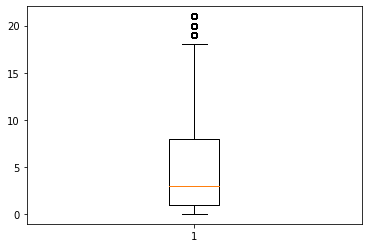

In [25]:
plt.boxplot(data['UsefulCount'] )


### fequency encoding

col=['Drug','Sides','Condition']
for i in col :
    df[i]=pd.factorize(df[i])[0]



In [26]:
col=['Drug','Sides','Condition']
for i in col :
    fq = df.groupby(i).size()/len(df)
    df.loc[:, "{}_freq_encode".format(i)] = df[i].map(fq) 



In [27]:
df = df.drop(['Drug','Sides','Condition'], axis = 1) 

In [28]:
col2=[ 'Age','Sex']

from sklearn.preprocessing import LabelEncoder
for i in col2 :
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [29]:
df.head()

,Age,Date,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,Drug_freq_encode,Sides_freq_encode,Condition_freq_encode
0,10,9/21/2014,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,0,0.000193,0.000468,0.001392
1,3,1/13/2011,146724,5,5,cleared me right up even with my throat hurtin...,5,0,1,0.000193,0.000468,0.002174
6,3,6/15/2017,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,0,0,0.000007,0.038008,0.037869
7,6,1/30/2017,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,0,0,0.000007,0.038008,0.003759
9,7,10/29/2012,9800,4,2,The 12 hour spray only works for me for 6 hours.,2,1,0,0.000096,0.000403,0.001392


## Feature Engineering

In [30]:
#Clustering the drugs based on side effects and condition 

In [31]:
X= df.loc[:,['Effectiveness','Drug_freq_encode','Sides_freq_encode','Condition_freq_encode','Satisfaction']]

In [32]:
from sklearn.preprocessing import StandardScaler

standardisation = StandardScaler()
X= standardisation.fit_transform(X)

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X)
x=pca_data

1400635.0000002494
1007725.8702562106
770773.9143681098
623018.938480467
503865.6731891861
445145.2065787478
393284.63836396433
343921.61114460253
318821.5184328963
296260.19822379533
278632.0577097588


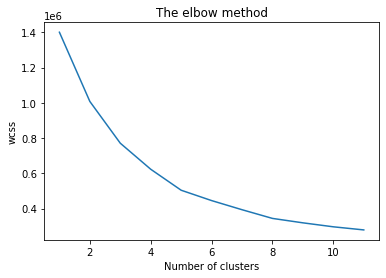

In [34]:
from sklearn.cluster import KMeans
wcss=[]

for i in range (1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[2 2 1 ... 0 2 2]


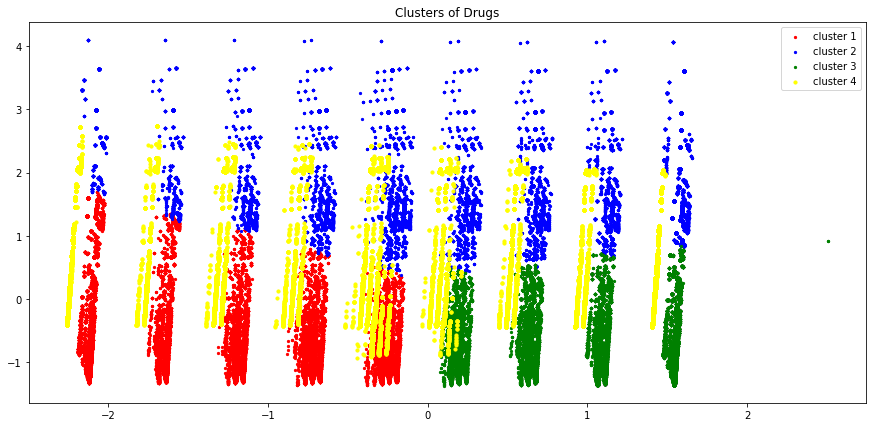

In [36]:
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],s=5,c='red',label='cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s=5,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s=5,c='green',label='cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,1],s=10,c='yellow',label='cluster 4')

plt.title('Clusters of Drugs')
plt.legend()
plt.show()


In [37]:
df["Sideeffect"]=y_kmeans

In [38]:
df.head(3)

,Age,Date,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,UsefulCount,Drug_freq_encode,Sides_freq_encode,Condition_freq_encode,Sideeffect
0,10,9/21/2014,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,0,0.000193,0.000468,0.001392,2
1,3,1/13/2011,146724,5,5,cleared me right up even with my throat hurtin...,5,0,1,0.000193,0.000468,0.002174,2
6,3,6/15/2017,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,0,0,0.000007,0.038008,0.037869,1


### splitting the dataset 


In [39]:
X = df.drop(['Sideeffect','Reviews','Date','DrugId'], axis=1)

y=df["Sideeffect"]

In [40]:
X.shape

(280127, 9)

In [41]:
y.shape

(280127,)

In [42]:
type(y)

pandas.core.series.Series

## Building Models

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Random forest 

In [80]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=10,n_estimators=7)
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25451
           1       0.99      0.99      0.99     17537
           2       1.00      1.00      1.00     29330
           3       1.00      0.99      0.99     11721

    accuracy                           0.99     84039
   macro avg       0.99      0.99      0.99     84039
weighted avg       0.99      0.99      0.99     84039



In [54]:
confusion_matrix(y_pred,y_test)

array([[25444,    10,     0,     1],
       [    7, 17517,     5,     5],
       [    0,     2, 29324,     0],
       [    0,     8,     1, 11715]], dtype=int64)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     25451
           1       0.40      0.29      0.33     17537
           2       0.71      0.82      0.76     29330
           3       0.83      0.63      0.71     11721

    accuracy                           0.70     84039
   macro avg       0.68      0.66      0.66     84039
weighted avg       0.69      0.70      0.69     84039



In [50]:
confusion_matrix(y_pred,y_test)

array([[22575,  4327,   521,  1129],
       [ 2246,  5022,  4575,   652],
       [   99,  7291, 24124,  2571],
       [  531,   897,   110,  7369]], dtype=int64)

### SGD classifier

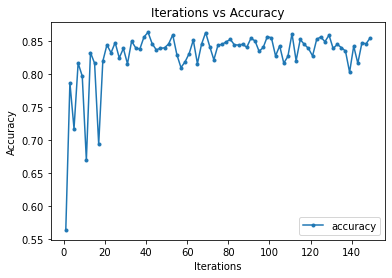

In [57]:
import warnings
warnings.filterwarnings("ignore")


Intercept=[]
ACC=[]

from sklearn.linear_model import SGDClassifier

iterations=[i for i in range(1,150,2)]

for i in iterations:
    
    sgdr=SGDClassifier(max_iter=i,eta0=0.01)
    sgdr.fit(X_train, y_train)
    y_pred=sgdr.predict(X_test)
    
    
    ints=sgdr.intercept_
    Intercept.append(ints)
    acc = accuracy_score(y_test,y_pred)
    ACC.append(acc)
    
    
    
plt.plot(iterations, ACC, label="accuracy",marker = '.') 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [61]:
iteration=[1,40,100,200,500,1000]
for i in iteration:
    
    
    sgdr1=SGDClassifier(max_iter=i,eta0=0.01)
    sgdr1.fit(X_train, y_train)
    y_pred=sgdr1.predict(X_test)
    
    
    print("\n\n------------For iteration = ",i,"-------------")
    print("\n---accuracy--- \n",accuracy_score(y_test,y_pred))
    




------------For iteration =  1 -------------

---accuracy--- 
 0.5774937826485322


------------For iteration =  40 -------------

---accuracy--- 
 0.8294839300800819


------------For iteration =  100 -------------

---accuracy--- 
 0.8588988445840622


------------For iteration =  200 -------------

---accuracy--- 
 0.8540915527314699


------------For iteration =  500 -------------

---accuracy--- 
 0.8338152524423185


------------For iteration =  1000 -------------

---accuracy--- 
 0.8407168100524757


In [62]:

sgdr12=SGDClassifier(max_iter=100,eta0=0.01)
sgdr12.fit(X_train, y_train)
y_pred=sgdr12.predict(X_test)


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     25451
           1       0.87      0.32      0.47     17537
           2       0.80      1.00      0.89     29330
           3       0.95      0.94      0.95     11721

    accuracy                           0.85     84039
   macro avg       0.87      0.81      0.81     84039
weighted avg       0.85      0.85      0.82     84039



In [64]:
confusion_matrix(y_pred,y_test)

array([[25188,  3947,     0,    56],
       [  203,  5681,   105,   542],
       [   30,  7346, 29216,    65],
       [   30,   563,     9, 11058]], dtype=int64)

### KNN

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [66]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

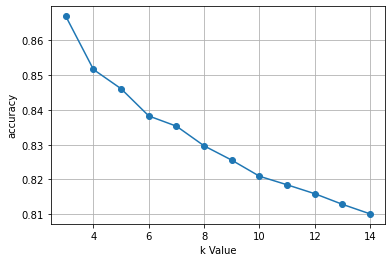

In [67]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [68]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     25451
           1       0.79      0.69      0.73     17537
           2       0.90      0.95      0.92     29330
           3       0.92      0.76      0.84     11721

    accuracy                           0.87     84039
   macro avg       0.87      0.84      0.85     84039
weighted avg       0.87      0.87      0.86     84039



In [70]:
confusion_matrix(y_pred,y_test)

array([[24090,  2697,   126,  1285],
       [ 1111, 12016,  1299,   874],
       [   53,  2390, 27804,   617],
       [  197,   434,   101,  8945]], dtype=int64)

### SVM

In [ ]:
#svm takes infinite time for running 

### Decision Tree model

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25451
           1       1.00      1.00      1.00     17537
           2       1.00      1.00      1.00     29330
           3       1.00      1.00      1.00     11721

    accuracy                           1.00     84039
   macro avg       1.00      1.00      1.00     84039
weighted avg       1.00      1.00      1.00     84039



In [73]:
confusion_matrix(y_pred,y_test)

array([[25444,    18,     0,     0],
       [    7, 17512,     1,     3],
       [    0,     2, 29328,     0],
       [    0,     5,     1, 11718]], dtype=int64)

### Gaussian Naïve Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     25451
           1       0.86      0.98      0.91     17537
           2       0.99      0.94      0.97     29330
           3       0.99      0.92      0.95     11721

    accuracy                           0.95     84039
   macro avg       0.95      0.95      0.95     84039
weighted avg       0.96      0.95      0.95     84039



In [76]:
confusion_matrix(y_pred,y_test)

array([[24354,   227,   498,   300],
       [ 1068, 17153,  1146,   614],
       [   29,    74, 27686,    43],
       [    0,    83,     0, 10764]], dtype=int64)